# Inicialización

Definamos algunas variables de entorno que utilizaremos a lo largo de este notebook:

In [1]:
from pathlib import Path

CDPP_TP1 = Path.cwd()

### Simulador CD++

In [2]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1/src
#pwd
#Comentar make clean ante un error
#make clean

make -j4

make -C ../../../src/cd++ cd++ OUT_DIR=/home/kanxo/SED/CDPP_ExtendedStates-codename-Santi/examples/sed_tp1/src/bin MODEL_FLAGS=-DREGISTER_ATOMICS
make[1]: Entering directory '/home/kanxo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++'
make -C /home/kanxo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics OBJ_DIR=obj SRC_DIR=/home/kanxo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++ MODEL_FLAGS=-DREGISTER_ATOMICS
make -C /home/kanxo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/cell OBJ_DIR=obj SRC_DIR=/home/kanxo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++ MODEL_FLAGS=-DREGISTER_ATOMICS
make[2]: Entering directory '/home/kanxo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/atomics'
make -C cpu OBJ_DIR=obj SRC_DIR=/home/kanxo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++
make -C queue OBJ_DIR=obj SRC_DIR=/home/kanxo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++
make -C /home/kanxo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/evt OBJ_DIR=obj SRC_DIR=/home/kanxo/SED/C

/usr/bin/ld: /home/kanxo/SED/CDPP_ExtendedStates-codename-Santi/examples/sed_tp1/src/bin/libsimu.a(macroexp.o): in function `macroExpansion::expand[abi:cxx11]()':
/home/kanxo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/utils/macroexp.cpp:147: warning: the use of `tmpnam' is dangerous, better use `mkstemp'
/usr/bin/ld: warped/notime/obj/DebugStream.o: in function `DebugStream::interact()':
/home/kanxo/SED/CDPP_ExtendedStates-codename-Santi/src/cd++/warped/notime/DebugStream.cpp:682: warning: the `gets' function is dangerous and should not be used.


## Simulación del modelo con CD++

Ahora nos paramos en donde se encuentra el ejecutable de la simulación y corremos la simulación:

In [3]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1

src/bin/cd++ -m ./tests/test01_persona.ma \
         -o ./tests/test01_persona.out \
         -l ./tests/test01_persona.log \
         -t 10:00:00:00

PCD++: A Tool to Implement n-Dimensional Cell-DEVS models
Version 3.0 - March 2003
Troccoli A., Rodriguez D., Wainer G., Barylko A., Beyoglonian J., Lopez A.
-----------------------------------------------------------------------------
PCD++ Extended States: An extended and improved version of CD++ for Cell-DEVS
Version 4.1.2 - December 2018
Santi L., Castro, R., Pimás, J.
-----------------------------------------------------------------------------
Discrete Event Simulation Lab
Departamento de Computación
Facultad de Ciencias Exactas y Naturales
Universidad de Buenos Aires, Argentina
-----------------------------------------------------------------------------
Compiled for standalone simulation


Loading models from ./tests/test01_persona.ma
Loading events from 
Running parallel simulation. Reading models partition from 
Model partition details output to: /dev/null*
Message log: ./tests/test01_persona.log
Output to: ./tests/test01_persona.out
Tolerance set to: 1e-08
Configuration to s

### Análisis de los resultados

Veamos el resultado:

In [4]:
%%bash -s "$CDPP_TP1"

cd $1/out

cat persona.out

00:00:14:476:0.268768 out_port1 [0.5, 0.2]
00:03:11:119:0.694305 out_port1 [0.5, 0.2]
00:03:35:134:0.963181 out_port1 [0.5, 0.2]
00:04:08:493:0.0798798 out_port1 [0.5, 0.2]
00:05:07:625:0.393204 out_port1 [0.5, 0.2]
00:06:53:834:0.896927 out_port1 [0.5, 0.2]
00:08:05:017:0.995316 out_port1 [0.5, 0.2]
00:09:41:194:0.288284 out_port1 [0.5, 0.2]
00:09:44:142:0.616613 out_port1 [0.5, 0.2]
00:11:20:108:0.742651 out_port1 [0.5, 0.2]
00:12:38:938:0.0583858 out_port1 [0.5, 0.2]
00:12:44:378:0.693186 out_port1 [0.5, 0.2]
00:12:59:643:0.300211 out_port1 [0.5, 0.2]
00:13:12:545:0.102823 out_port1 [0.5, 0.2]
00:14:04:586:0.538614 out_port1 [0.5, 0.2]
00:18:37:683:0.180704 out_port1 [0.5, 0.2]
00:19:44:076:0.568094 out_port1 [0.5, 0.2]
00:19:59:939:0.937632 out_port1 [0.5, 0.2]
00:20:22:830:0.216043 out_port1 [0.5, 0.2]
00:21:30:488:0.39683 out_port1 [0.5, 0.2]
00:22:06:938:0.649912 out_port1 [0.5, 0.2]
00:22:48:908:0.598276 out_port1 [0.5, 0.2]
00:23:27:966:0.0863132 out_port1 [0.5, 0.2]
00:24:24:

In [5]:
import networkx as nx
import numpy as np
def generarMA(n, maxG, ps, infs, pcs, tss, grados, pms, file="model.ma"):
    
    grados[grados>maxG] = maxG
    if(grados.sum() % 2 != 0):
        if(grados[0] < maxG):
            grados[0] = grados[0]+1
        else:
            grados[0] = grados[0]-1
            
    ps[ps>1] = 1
    ps[ps<-1] = -1

    infs[infs>1] = 1
    infs[infs<0] = 0
    
    pcs[pcs>1] = 1
    pcs[pcs<0] = 0

    tss[infs>1] = 1
    tss[infs<0] = 0
    
    pms[pms<0] = 0    
    
    f = open(CDPP_TP1.joinpath("model/"+file),'w')
    f.write("[Top]\n")
    f.write("components : Sociedad\n")
    
    f.write("in: infoRequest\n")

    for i in range(0,n):
        f.write("out : info_out"+str(i)+"\n")

    f.write("Link : infoRequest infoRequest@Sociedad\n")
    for i in range(0,n):
        f.write("Link : info_out"+str(i)+"@Sociedad info_out"+str(i)+"\n")

    f.write("\n[Sociedad]\n")
    for i in range(0,n):
        f.write("components: Persona"+str(i)+"@Persona\n")
    f.write("in : infoRequest medios\n")
    for i in range(0,n):
        f.write("out : info_out"+str(i)+"\n")
    for i in range(0,n):
        f.write("Link : outInfo@Persona"+str(i)+" info_out"+str(i)+"\n")
        f.write("Link : infoRequest infoRequest@Persona"+str(i)+"\n")

    conf_model = nx.configuration_model(grados)
    conf_model = nx.Graph(conf_model)
    conf_model.remove_edges_from(nx.selfloop_edges(conf_model))

    puerto_mas_alto = dict.fromkeys(range(0,n),1)

    for node in range(0,n):

        neighborhood = nx.all_neighbors(conf_model, node)
        degree = nx.degree(conf_model, node)
        nombre = "@Persona"+str(node)

        for neighbor in neighborhood:
            if neighbor > node:
                port = puerto_mas_alto[node]
                puerto_mas_alto[node] += 1

                out_port = "outPort"+str(port)
                in_port = "inPort"+str(port)

                port_neighbor = puerto_mas_alto[neighbor]
                puerto_mas_alto[neighbor] += 1

                nombre_vecino = "@Persona"+str(neighbor)
                out_port_neighbor = "outPort"+str(port_neighbor)
                in_port_neighbor = "inPort"+str(port_neighbor)

                f.write("Link : "+out_port+nombre+" "+in_port_neighbor+nombre_vecino+"\n")
                f.write("Link : "+out_port_neighbor+nombre_vecino+" "+in_port+nombre+"\n")

    for i in range(0,n):
        f.write("\n[Persona"+str(i)+"]\n")
        f.write("p : "+str(ps[i])+"\n")
        f.write("influenciabilidad : "+str(infs[i])+"\n")
        f.write("poder_convencimiento : "+str(pcs[i])+"\n")
        f.write("tiempo_sillon : "+str(tss[i])+"\n")
        f.write("periodo_medio : "+str(pms[i])+"\n")
        f.write("grado : "+str(nx.degree(conf_model, i))+"\n")

    f.close()
    return conf_model

In [6]:
n = 1000

ps = np.random.normal(0,0.7,n)
ps[ps>1] = 1
ps[ps<-1] = -1

infs =  np.random.normal(0.5,0.2,n)
infs[infs>1] = 1
infs[infs<0] = 0

pcs =  np.random.normal(0.5,0.2,n)
pcs[pcs>1] = 1
pcs[pcs<0] = 0

tss =  np.random.normal(0.5,0.2,n)
tss[infs>1] = 1
tss[infs<0] = 0

maxG =5
mean = 3

grados = np.random.poisson(mean, n)
grados[grados > maxG] = maxG
if(grados.sum() % 2 != 0):
    if(grados[0] < maxG):
        grados[0] = grados[0]+1
    else:
        grados[0] = grados[0]-1

pms =  np.random.normal(1000,10,n)
pms[pms<0] = 0

graph = generarMA(n, maxG, ps, infs, pcs, tss, grados, pms, file="model.ma")

In [7]:
%%bash -s "$CDPP_TP1"

cd $1/model

cat model.ma

[Top]
components : Sociedad
in: infoRequest
out : info_out0
out : info_out1
out : info_out2
out : info_out3
out : info_out4
out : info_out5
out : info_out6
out : info_out7
out : info_out8
out : info_out9
out : info_out10
out : info_out11
out : info_out12
out : info_out13
out : info_out14
out : info_out15
out : info_out16
out : info_out17
out : info_out18
out : info_out19
out : info_out20
out : info_out21
out : info_out22
out : info_out23
out : info_out24
out : info_out25
out : info_out26
out : info_out27
out : info_out28
out : info_out29
out : info_out30
out : info_out31
out : info_out32
out : info_out33
out : info_out34
out : info_out35
out : info_out36
out : info_out37
out : info_out38
out : info_out39
out : info_out40
out : info_out41
out : info_out42
out : info_out43
out : info_out44
out : info_out45
out : info_out46
out : info_out47
out : info_out48
out : info_out49
out : info_out50
out : info_out51
out : info_out52
out : info_out53
out : info_out54
out : info_out55
out : info_out

In [8]:
%%bash -s "$CDPP_TP1"

# prueba de que anduvo bien la compilación:

cd $1

src/bin/cd++ -m ./model/model.ma \
         -e ./model/eventos.ev  \
         -o ./out/salidas.out \
         -l ./out/logPrueba.log \
         -t 00:10:00:00

PCD++: A Tool to Implement n-Dimensional Cell-DEVS models
Version 3.0 - March 2003
Troccoli A., Rodriguez D., Wainer G., Barylko A., Beyoglonian J., Lopez A.
-----------------------------------------------------------------------------
PCD++ Extended States: An extended and improved version of CD++ for Cell-DEVS
Version 4.1.2 - December 2018
Santi L., Castro, R., Pimás, J.
-----------------------------------------------------------------------------
Discrete Event Simulation Lab
Departamento de Computación
Facultad de Ciencias Exactas y Naturales
Universidad de Buenos Aires, Argentina
-----------------------------------------------------------------------------
Compiled for standalone simulation


Loading models from ./model/model.ma
Loading events from ./model/eventos.ev
Running parallel simulation. Reading models partition from 
Model partition details output to: /dev/null*
Message log: ./out/logPrueba.log
Output to: ./out/salidas.out
Tolerance set to: 1e-08
Configuration to show rea

In [9]:
#Lo use para testear el pasaje a 

import re
f = open("model.ma", "r")
file_contents = f.read()
lines = file_contents.replace("Link : ", "").split("\n")[:-1]
assert 2*nx.number_of_edges(conf_model) == len(lines)
for node in range(0,n):
    for port in range(1,maxG +1):
        inPort = file_contents.count("inPort"+str(port)+"@Persona"+str(node)+"\n")
        outPort = file_contents.count("outPort"+str(port)+"@Persona"+str(node)+" ")
        #print(node, port, "inPort", inPort, "outPort", outPort)
        assert inPort <= 1
        assert outPort <= 1
#print(file_contents)
for line in lines:
    numbers = re.findall(r'\d+', line)
    outPort = numbers[0]
    outPerson = numbers[1]
    inPort = numbers[2]
    inPerson = numbers[3]
    lineVuelta = "outPort"+str(inPort)+"@Persona"+str(inPerson)+" inPort"+str(outPort)+"@Persona"+str(outPerson)
    assert lines.count(lineVuelta) == 1, "falta "+lineVuelta+ "\npor: "+line
f.close()



FileNotFoundError: [Errno 2] No such file or directory: 'model.ma'

<AxesSubplot:>

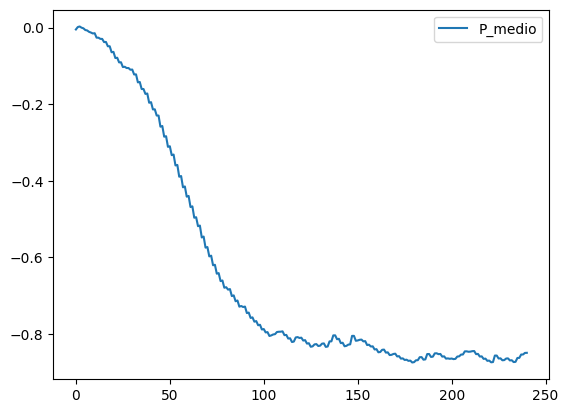

In [10]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def getDataFrom(file="out/testTiempo.out"):
    
    f = open(file, "r")
    file_contents = f.read()
    lines = file_contents.split("\n")[:-1]
    for i in range(0,len(lines)):
        lines[i] = re.split('\s+', lines[i])
        lines[i][1] = re.findall(r'\d+', lines[i][1])[0]
    lines = np.array(lines)
 

    df = pd.DataFrame(columns = ['Tiempo', 'Persona', 'P'])
    df['Tiempo'] = lines[:,0]
    df['Persona'] = lines[:,1].astype(int)
    df['P'] = lines[:,2].astype(float)
    
    return df

def meansFromDF(df):
    data = df.to_numpy().reshape(241,1000,3)
    means = np.zeros(data.shape[0])
    tiempos = []
    for i in range(data.shape[0]):
        means[i] = data[i,:,2].mean()
        tiempos.append(data[i,0,0])
        
    df = pd.DataFrame(columns = ['Tiempo', 'P_medio'])
    df['Tiempo'] = tiempos
    df['P_medio'] = means
    
    return df

df = getDataFrom("out/testTiempo.out")

means = meansFromDF(df)

    
means.plot()
